### Multi-Layer Preceptron and Back propagation
#### (only using numpy)

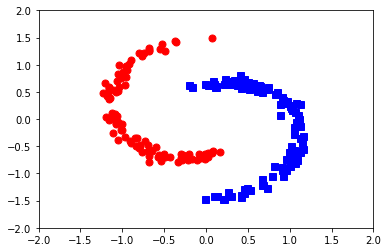

In [3]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 2 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
#y = np.zeros(N*C) # class labels
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.6,1.5,N) # radius
  t = np.linspace(j*3,(j+1)*3,N) + np.random.randn(N)*0.2 # theta

  X[:,ix] = np.c_[r*(np.sin(t)), r*(np.cos(t))].T
  y[ix] = j


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
#plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')

plt.xlim([-2, 2]) # scale ti le cai hinh la cho dep
plt.ylim([-2, 2])

plt.show()


In [5]:
def softmax(V):
    # tru cho np.max de chống tràn số khi số mũ quá lớn
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

from scipy import sparse 
def convert_labels(y, C =2):
    K = np.ones_like(y)
    L = np.ones_like(y)
    #L[K[]]
    
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

def cost(Y, Yhat):    # hàm kiểm tra chi phí chứ ko dùng để tính E2
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## Train with BGD

iter 0, loss: 0.693433
iter 1000, loss: 0.005084
iter 2000, loss: 0.000868
iter 3000, loss: 0.000434
iter 4000, loss: 0.000281
BGD learing rate : 1.00


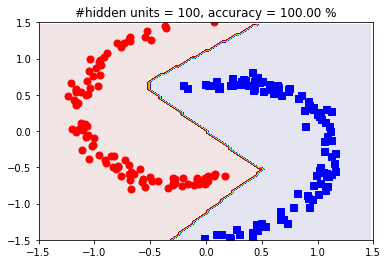

In [44]:
d0 = 2 # số nút cua layer 1  vì đầu vào gồm 1 điểm tọa độ (a,b)
d1 = h = 100 # size of hidden layer ?
d2 = C = 2 # số nút của layer 2

# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1) # số chiều là (d0,d1)
b1 = np.zeros((d1, 1))# số chiều là (d1,1)  z1 = W.T*a + b - > b phải cùng số chiều với z
W2 = 0.01*np.random.randn(d1, d2) # số chiều là d1 d2
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1] # = 300 X.shape = (d0 , N*C)
eta = 1 # learning rate
for i in range(5000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1    #  --d1*d0 X d0*N-- + d1*1
    A1 = np.maximum(Z1, 0)       # a1 = ReLU(z1)
    Z2 = np.dot(W2.T, A1) + b2   # z2 = W2.T*a1 + b2  W2 100*2- > số chiều 2x100
    Yhat = softmax(Z2)           # a2 = softmax(z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T) #dJ/dW2
    db2 = np.sum(E2, axis = 1, keepdims = True) 
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    # gán tất cá những điểm mà Z1<=0 thì có đạo hàm = 0
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2
    
    
Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('BGD learing rate : %.2f' % eta)


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym) # quét hết tất cả các điểm có tọa độ (x,y) x thuộc(-1.5,1.5) y (-1.5,1.5)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2

plt.subplot(1,1,1)
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 300, cmap='jet', alpha = .1)
N = 100
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
plt.show()

## Training with SGD

SGD learning rate : 0.10 


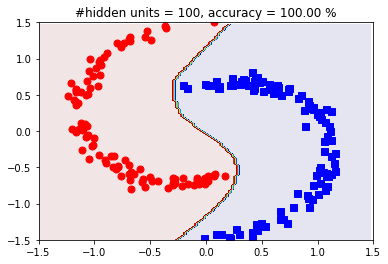

In [43]:
d0 = 2
d1 = 100
d2 = C = 2
W1 = np.random.randn(d0,d1)
b1 = np.zeros((d1,1))
W2 = np.random.randn(d1,d2)
b2 = np.zeros((d2,1))

Y = convert_labels(y,2)
N = X.shape[1]
eta = 0.1
#Yhat = np.zeros((d0,1))

for it in range(10):
    rd_id = np.random.permutation(N)
    for i in range(0,N):
        id_ = rd_id[i]
        #xtemp = np.zeros((d0,1))
        xtemp = X[:,id_:id_+1]           #2x1
        Ytemp = Y[:,id_:id_+1]#.reshape(d0,1)

        z1 = np.dot(W1.T,xtemp)+b1    #100x1
        a1 = np.maximum(z1,0)         #100x1
        z2 = np.dot(W2.T,a1)+b2       #2x1
        Yhat = softmax(z2)            #2x1
        
        e2 = (Yhat-Ytemp)
        dw2 = np.dot(a1,e2.T) #100x2 = 100x1 dot 1x2
        db2 = e2
        e1 = np.dot(W2,e2) # 50x2 * 2x1
        e1[z1<=0] = 0 # nhan them f'
        
        dw1 = np.dot(xtemp,e1.T)
        db1 = e1

        W1 += -eta*dw1
        W2 += -eta*dw2
        b1 += -eta*db1
        b2 += -eta*db2

Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('SGD learning rate : %.2f ' % eta)


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym) # quét hết tất cả các điểm có tọa độ (x,y) x thuộc(-1.5,1.5) y (-1.5,1.5)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2

plt.subplot(1,1,1)
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 300, cmap='jet', alpha = .1)

N = 100
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
plt.show()